In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/output.csv')
data.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [2]:
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential

In [3]:
data.dtypes

,0
Number,int64
Sex,object
%Red Pixel,float64
%Green pixel,float64
%Blue pixel,float64
Hb,float64
Anaemic,object


In [4]:
data.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [5]:
data.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

Text(0, 0.5, 'Hb')

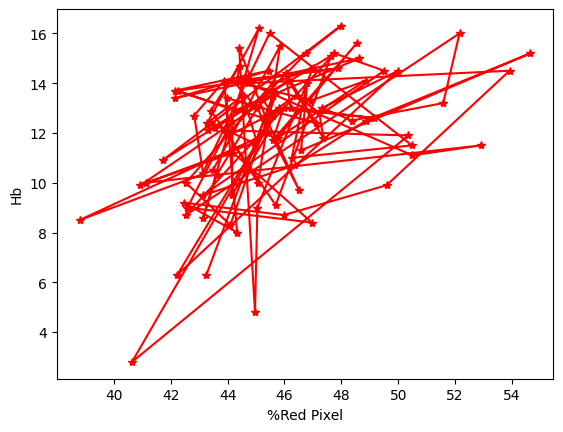

In [6]:
import matplotlib.pyplot as plt
plt.plot(data['%Red Pixel'], data['Hb'], marker='*',color='red')
plt.xlabel('%Red Pixel')
plt.ylabel('Hb')

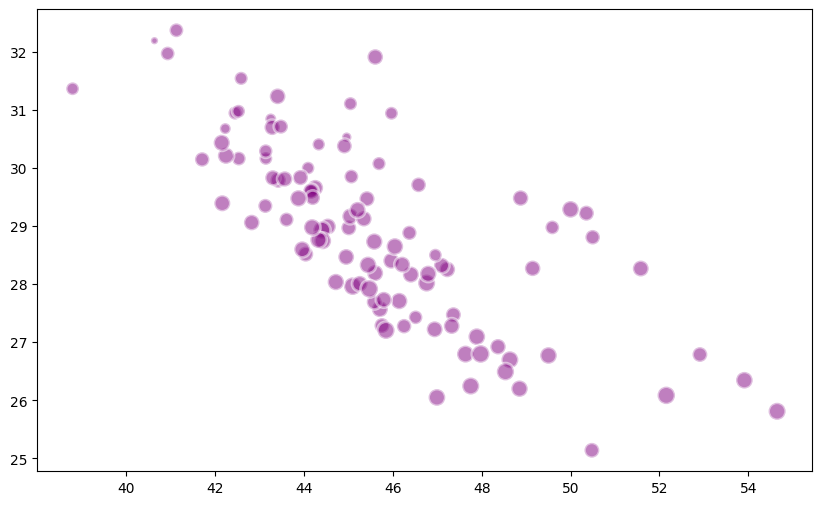

In [7]:
plt.figure(figsize=(10, 6))
bubble_size = data['Hb'] * 10
plt.scatter(data['%Red Pixel'], data['%Green pixel'], s=bubble_size, alpha=0.5, c='purple', edgecolors="w", linewidth=2)

([<matplotlib.patches.Wedge at 0x7caeb6661d10>,
 [Text(-1.074718704967396, 0.23447751532546438, "('F', 'No')"),
  Text(-0.9257416185280737, -0.5941400977252945, "('F', 'Yes')"),
  Text(-0.23447734023155953, -1.0747187431686178, "('F ', 'No')"),
  Text(0.5079236252323908, -0.9757118380601857, "('F ', 'Yes')"),
  Text(1.0869153983012176, -0.16915944234864794, "('M', 'No')"),
  Text(0.8881791393595997, 0.6489513205213785, "('M', 'Yes')"),
  Text(0.23447750250957228, 1.0747187077635123, "('M ', 'No')"),
  Text(-0.6754806962487936, 0.8681738472191184, "('M ', 'Yes')")],
 [Text(-0.5862102027094886, 0.12789682654116236, '15.4%'),
  Text(-0.5049499737425857, -0.3240764169410697, '9.6%'),
  Text(-0.1278967310353961, -0.5862102235465187, '15.4%'),
  Text(0.2770492501267586, -0.5322064571237376, '6.7%'),
  Text(0.5928629445279369, -0.09226878673562615, '23.1%'),
  Text(0.4844613487415998, 0.3539734475571155, '1.9%'),
  Text(0.12789681955067578, 0.586210204234643, '21.2%'),
  Text(-0.3684440161357

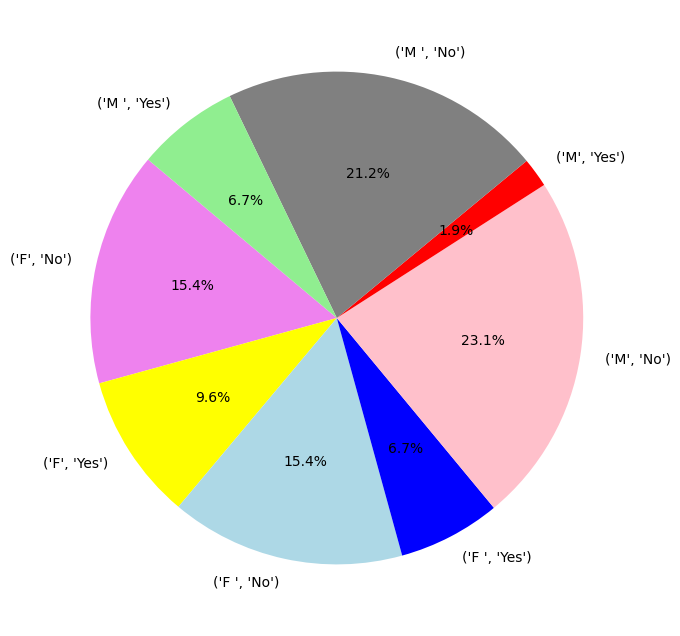

In [8]:
plt.figure(figsize=(8, 8))
grouped_data = data.groupby('Sex')['Anaemic'].value_counts()

plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%',
        colors=['violet','yellow','lightblue','blue','pink', 'red', 'grey','lightgreen','orange', 'purple','green','brown'],
        startangle=140)

In [9]:
import seaborn as sns

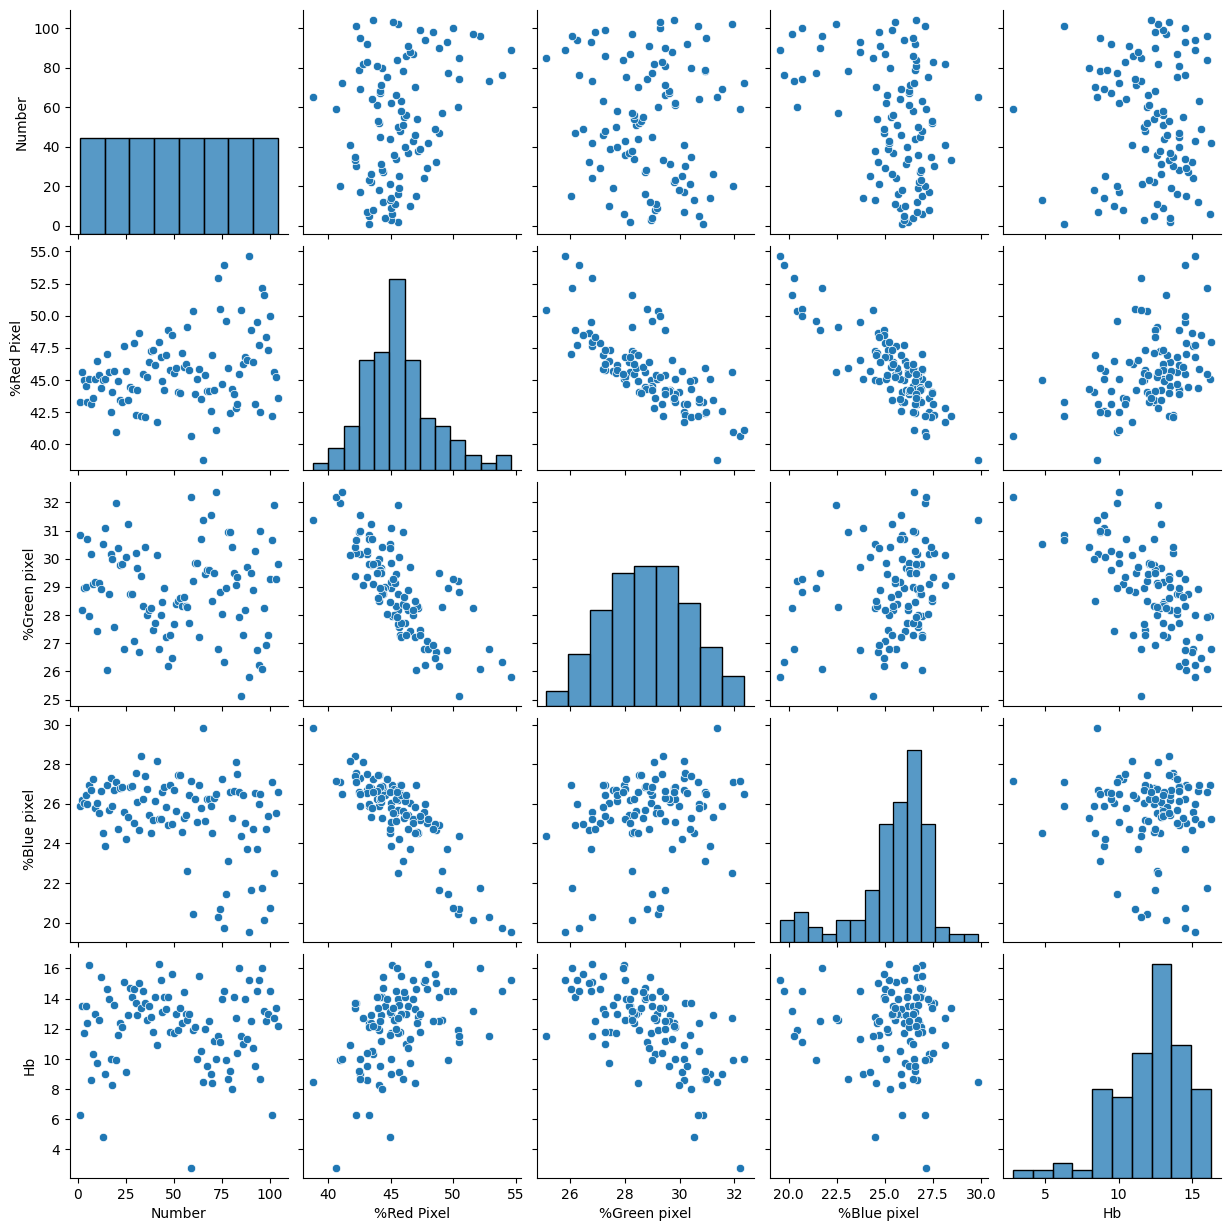

In [10]:
sns.pairplot(data)

<Axes: >

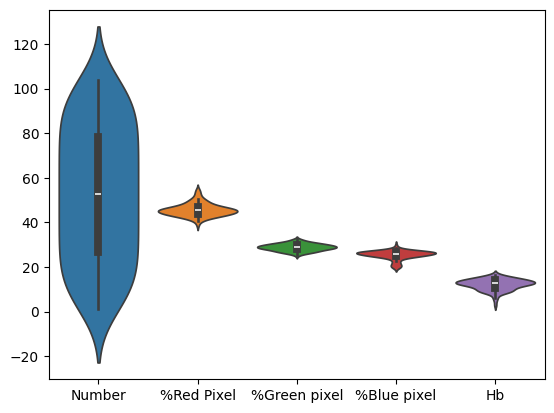

In [11]:
sns.violinplot(data)

<Axes: xlabel='Hb', ylabel='%Blue pixel'>

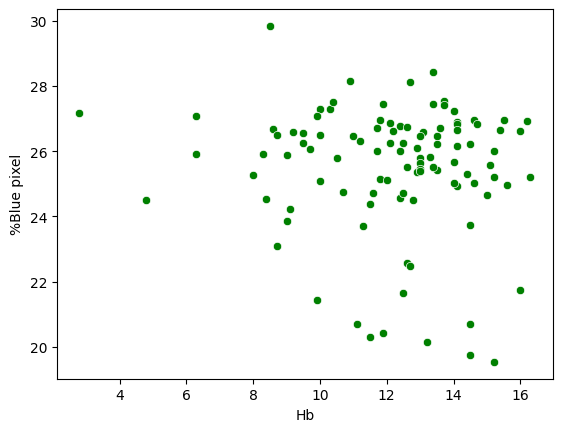

In [12]:
sns.scatterplot(x='Hb', y='%Blue pixel', data=data, color='green')

In [13]:
import plotly.express as px
fig = px.imshow(data, title='Heatmap')
fig.show()


In [14]:
fig = px.line_polar(data, r='Sex', theta='Hb',color_discrete_sequence=['purple'])
fig.show()

In [15]:
fig = px.bar(data, x='%Green pixel', y='Hb', color='%Green pixel', color_discrete_sequence=['purple'], title='Bar Chart')
fig.show()

In [16]:
from bokeh.plotting import figure, show
import numpy as np


values = data['Hb']

hist, edges = np.histogram(values, bins=50)
p = figure(title="Histogram", x_axis_label='Hb', y_axis_label='Anaemic')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)

show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource

data['Hb'] = pd.to_numeric(data['Hb'], errors='coerce')

grouped_data = data.groupby('Anaemic')['Hb'].mean().reset_index()

categories = grouped_data['Anaemic']
values = grouped_data['Hb']

source = ColumnDataSource(data=dict(categories=categories, values=values))

p = figure(x_range=categories, title="Bar Chart", x_axis_label='Anaemic', y_axis_label='Hb')
p.vbar(x=dodge('categories', 0.0, range=p.x_range), top='values', width=0.9, source=source)

show(p)



array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': '%Red Pixel'}>,
        <Axes: title={'center': '%Green pixel'}>],
       [<Axes: title={'center': '%Blue pixel'}>,
        <Axes: title={'center': 'Hb'}>, <Axes: >]], dtype=object)

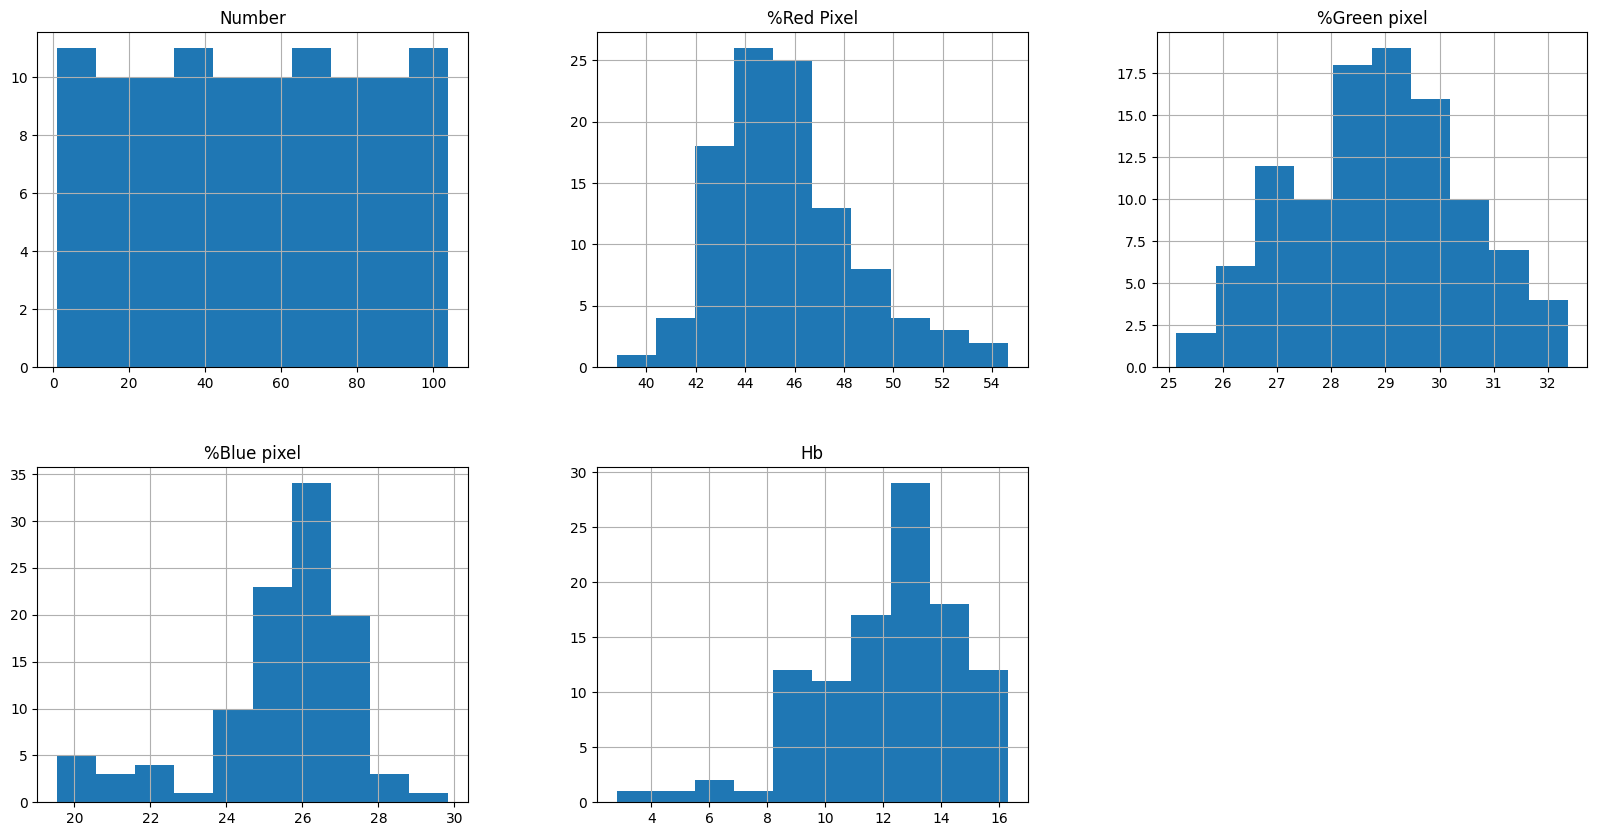

In [17]:
data.hist(figsize =(20,10),layout=(2,3))

In [18]:
data['Sex'].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [19]:
data['Sex'] = data['Sex'].str.strip()
data['Sex'].unique()

array(['M', 'F'], dtype=object)

<Axes: >

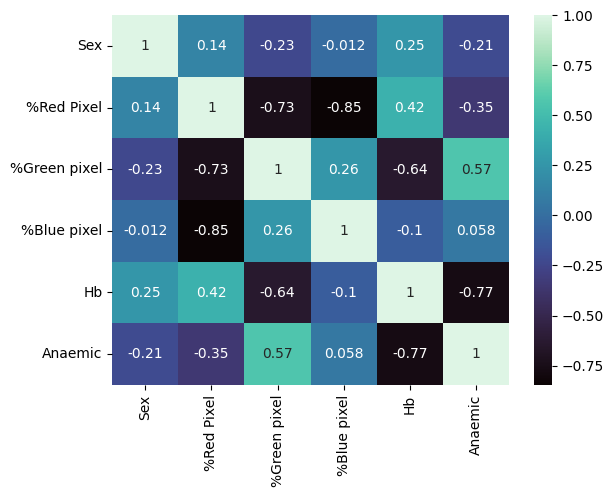

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.Sex = le.fit_transform(data.Sex)
data.Anaemic = le.fit_transform(data.Anaemic)

data_1 = data.copy(deep = True)
data_1.drop('Number',axis =1,inplace=True)

data_cor_mat = data_1.corr()

sns.heatmap(data_cor_mat,cmap='mako',annot =True)

In [21]:
X = data_1.drop(columns = ['Anaemic'])
y = data_1['Anaemic']

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


dt = DecisionTreeClassifier(criterion='entropy')
rf = RandomForestClassifier()
gb = GradientBoostingClassifier(learning_rate = 0.12)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_validate,cross_val_score

In [24]:
data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,0,49.9999,29.2860,20.7141,14.5,1
100,101,1,42.2324,30.6757,27.0919,6.3,1
101,102,0,45.6064,31.9084,22.4852,12.7,0
102,103,1,45.2095,29.2769,25.5136,13.4,0


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('Hb', axis=1)
Y = data['Hb']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


if Y_train.dtype in ['float64', 'float32', 'int64', 'int32']:
    threshold = Y_train.median()
    Y_train_discrete = (Y_train > threshold).astype(int)

    Y_test_discrete = (Y_test > threshold).astype(int)
else:
    Y_train_discrete = Y_train
    Y_test_discrete = Y_test

m=lr.fit(X_train, Y_train_discrete)
m1=m.predict(X_test)


accuracy = accuracy_score(Y_test_discrete, m1)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(Y_test_discrete, m1))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.85      0.92      0.88        12

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.85        21
weighted avg       0.86      0.86      0.86        21



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(criterion='entropy')

# The rest of your code
if Y_train.dtype in ['float64', 'float32', 'int64', 'int32']:
    threshold = Y_train.median()
    Y_train_discrete = (Y_train > threshold).astype(int) # Y_train_discrete was not defined in the original traceback block
    Y_test_discrete = (Y_test > threshold).astype(int)
else:
    Y_train_discrete = Y_train
    Y_test_discrete = Y_test
dt.fit(X_train,Y_train_discrete)

Y_pred_dt = dt.predict(X_test)


print(accuracy_score(Y_test_discrete,Y_pred_dt))


classification_report(Y_test_discrete,Y_pred_dt)

0.8571428571428571


'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84         9\n           1       0.91      0.83      0.87        12\n\n    accuracy                           0.86        21\n   macro avg       0.85      0.86      0.86        21\nweighted avg       0.86      0.86      0.86        21\n'

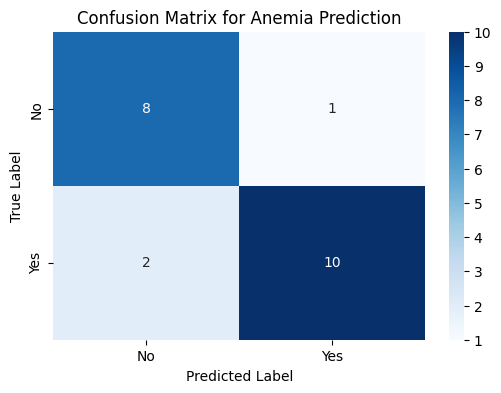

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test_discrete, Y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Anemia Prediction')
plt.show()

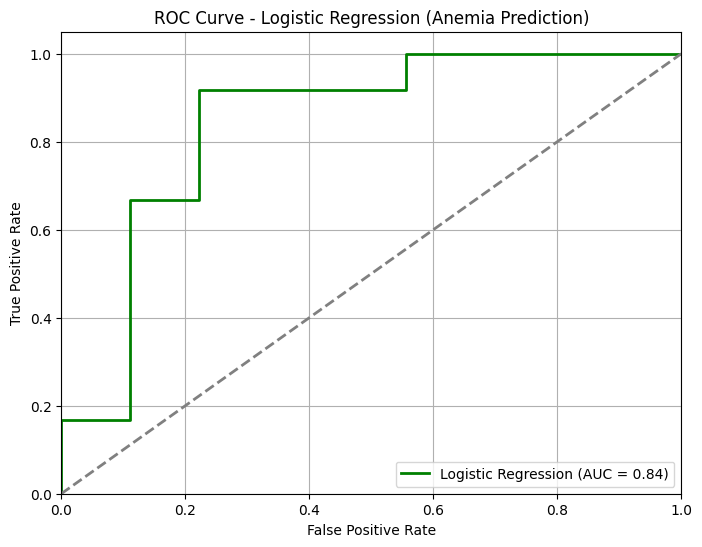

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

log_reg = LogisticRegression()

if Y_train.dtype in ['float64', 'float32', 'int64', 'int32']:

    threshold = Y_train.median()
    Y_train_discrete = (Y_train > threshold).astype(int)
    Y_test_discrete = (Y_test > threshold).astype(int)
else:
    Y_train_discrete = Y_train
    Y_test_discrete = Y_test

log_reg.fit(X_train, Y_train_discrete)


y_proba_log = log_reg.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(Y_test_discrete, y_proba_log)
roc_auc_log = roc_auc_score(Y_test_discrete, y_proba_log)


plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Anemia Prediction)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()